In [1]:
import requests
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

%matplotlib inline

from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
pd_raw = pd.read_csv(r'C:\Users\pc\Desktop\EDS\ads_covid-19\data\raw\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv')
df_plot = pd.DataFrame({'date':pd_raw.columns[4:]})

time_idx = [datetime.strptime(each, '%m/%d/%y') for each in df_plot.date]
time_str = [each.strftime('%Y-%m-%d') for each in time_idx]
df_plot['date'] = time_str

In [3]:
page = requests.get("https://www.worldometers.info/world-population/population-by-country/")
soup = BeautifulSoup(page.content, 'html.parser')
html_table = soup.find('table')
all_rows = html_table.find_all('tr')
final_data_list = []

for pos, rows in enumerate(all_rows):
    col_list=[each_col.get_text(strip=True) for each_col in rows.find_all('td')]
    final_data_list.append(col_list)

countries = pd.DataFrame(final_data_list).dropna().iloc[:,1:2]
population = pd.DataFrame(final_data_list).dropna().iloc[:,2:3]

In [4]:
country_list = ['France', 'United Kingdom', 'Germany',]

country_population = []

for country in country_list:
    for index in range(len(countries)):
        if country == countries.iat[index,0]:
            country_population.append(population.iat[index,0].replace(',', ''))

for each in range(len(country_list)):
    df_plot[country_list[each]] = np.array(((pd_raw[pd_raw['Country/Region']==country_list[each]].iloc[:,4::].sum(axis=0)))/(np.int64(country_population[each])))

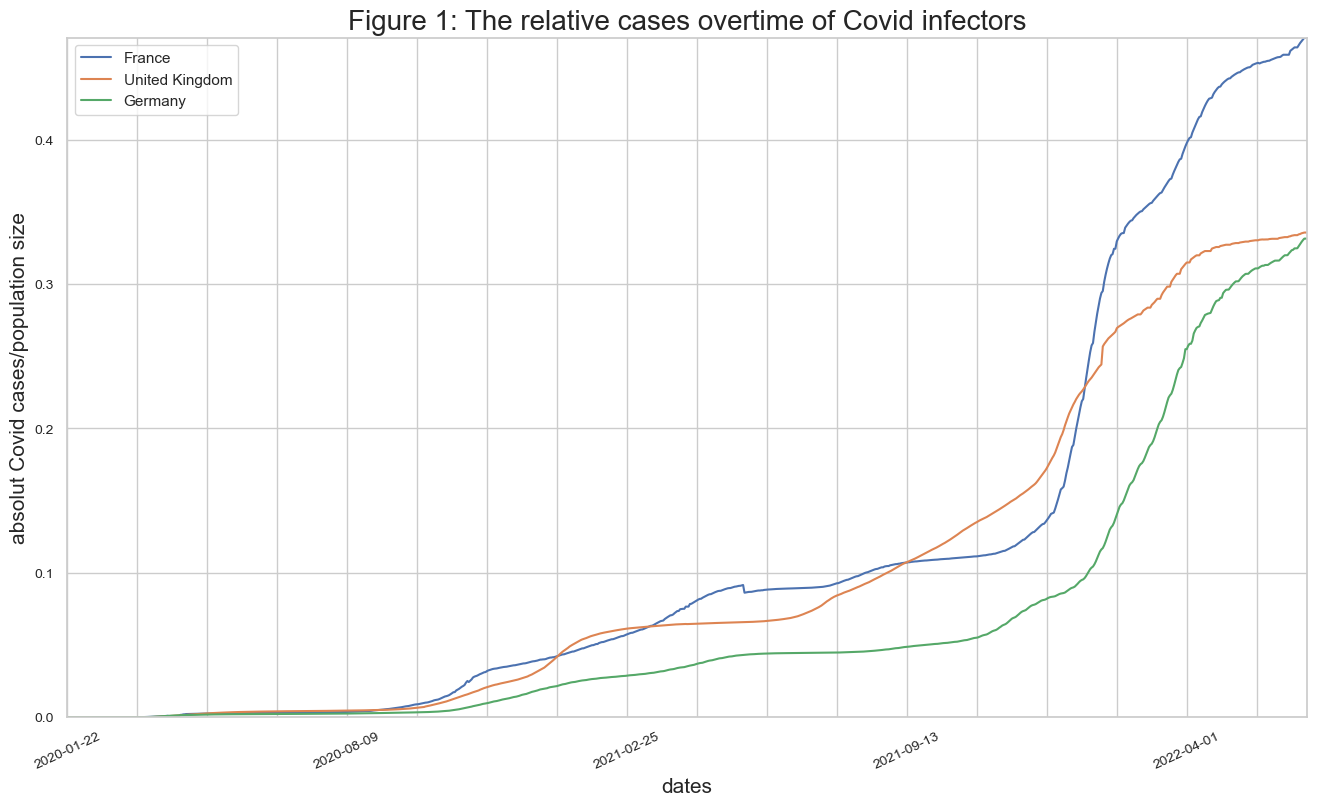

In [5]:
mpl.rcParams['figure.figsize'] = [16, 9]
mpl.rcParams['figure.dpi'] = 100
sns.set(style = 'whitegrid')

df_plot.iloc[:,:].set_index('date').plot()

plt.rcParams['axes.xmargin'] = 0
plt.xticks(np.arange(0, len(df_plot), 50), fontsize = 10, rotation = 25)
plt.yticks(fontsize = 10)
plt.xlabel('dates', fontsize = 15)
plt.ylabel('absolut Covid cases/population size', fontsize = 15)
plt.title('Figure 1: The relative cases overtime of Covid infectors', fontsize = 20)
plt.margins(0)